In [41]:
# Cities in Sweden - real dataset

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
df = pd.read_excel("data/komtopp50_2020.xlsx")

In [44]:
df = df.iloc[6:]
df.reset_index(drop=True, inplace=True)

In [45]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1,1.0,Stockholm,975551,974073.0,1478
1,2,2.0,Göteborg,583056,579281.0,3775
2,3,3.0,Malmö,347949,344166.0,3783
3,4,4.0,Uppsala,233839,230767.0,3072
4,5,5.0,Linköping,164616,163051.0,1565


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Unnamed: 1  50 non-null     float64
 2   Unnamed: 2  50 non-null     object 
 3   Unnamed: 3  50 non-null     object 
 4   Unnamed: 4  50 non-null     float64
 5   Unnamed: 5  50 non-null     object 
dtypes: float64(2), object(4)
memory usage: 2.5+ KB


In [47]:
df.describe()

,Unnamed: 1,Unnamed: 4
count,50.00000,50.000000
mean,25.50000,123740.320000
std,14.57738,149527.168738
min,1.00000,48333.000000
25%,13.25000,62911.250000
50%,25.50000,85071.000000
75%,37.75000,113096.250000
max,50.00000,974073.000000


In [48]:
df.rename(columns={"Unnamed: 0": "Rang 2020",
                   "Unnamed: 1": "Rang 2019",
                   "Unnamed: 2": "Kommun",
                   "Unnamed: 3": "Folkmängd 2020",
                   "Unnamed: 4": "Folkmängd 2019",
                   "Unnamed: 5": "Förändring",}, inplace=True)

In [49]:
df.sort_values(by="Folkmängd 2019", ascending=False, inplace=True)

In [50]:
df["Folkmängd 2020"] = df["Folkmängd 2020"].astype("float64")

In [51]:
population_2019 = df["Folkmängd 2019"].sum()

In [52]:
population_2020 = df["Folkmängd 2020"].sum()

In [53]:
print(f"Population in 2019: {population_2019}")
print(f"Population in 2020: {population_2020}")

Population in 2019: 6187016.0
Population in 2020: 6227447.0


In [54]:
largest_cities_2020 = df.nlargest(5, "Folkmängd 2020")
smallest_cities_2020 = df.nsmallest(5, "Folkmängd 2020")

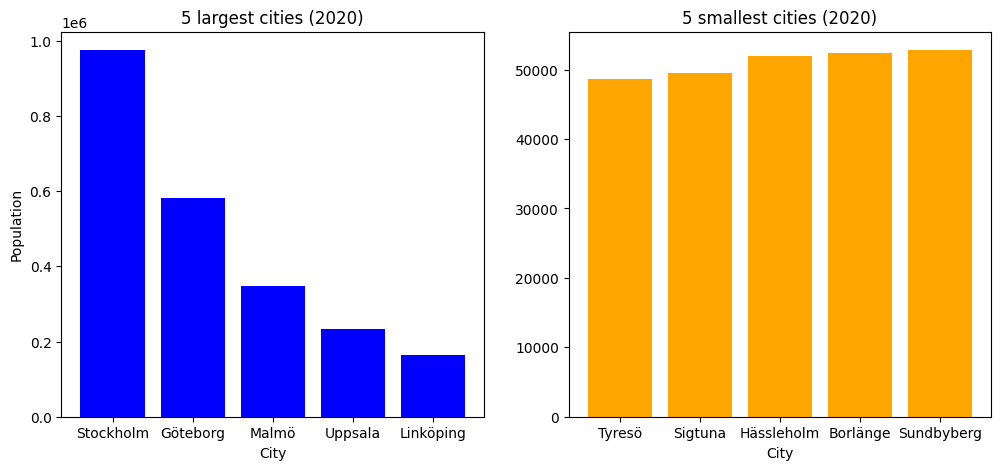

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].bar(largest_cities_2020["Kommun"], largest_cities_2020["Folkmängd 2020"], color="blue")
axes[0].set_title("5 largest cities (2020)")
axes[0].set_xlabel("City")
axes[0].set_ylabel("Population")

axes[1].bar(smallest_cities_2020["Kommun"], smallest_cities_2020["Folkmängd 2020"], color="orange")
axes[1].set_title("5 smallest cities (2020)")
axes[1].set_xlabel("City")

plt.show()